# Data exploration and analysis

## Load the data

In [1]:
%run ./0-loading_the_data_define_variables.ipynb

In [2]:
df = df[df.apply(is_valid_state, axis=1)]

# Create an instance of the ColumnTypeConverter
converter = ColumnTypeConverter(df)
# Convert the columns to the specified data types
converter.convert_to_int(COLUMNS_CONVERT_TO_INT)
converter.convert_to_float(COLUMNS_CONVERT_TO_FLOAT)
converter.convert_to_datetime(COLUMNS_CONVERT_TO_DATETIME)


print('Done!')

Done!


## Univariate Analysis

## Dependant variable: The target variable

### Check balanced dataset: Frequency of each output 

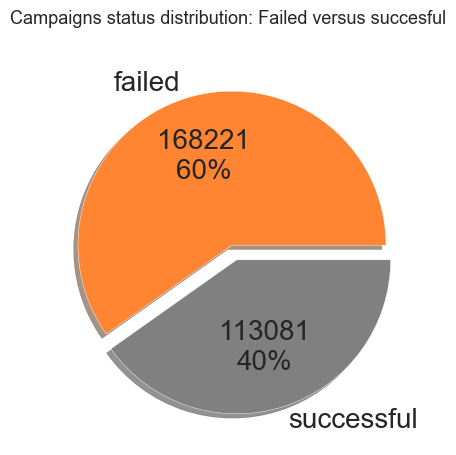

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

spaces = (0.05, 0.05)
label_function = lambda val:  f'{val / 100 * len(df):.0f}\n{val:.0f}%'


df.groupby(target).size().plot(kind= "pie", autopct=label_function,
                                           textprops={'fontsize': 20},
                                           ax=ax, colors= theme_colors, ylabel= "",
                                           shadow= True, explode= spaces)
fig.suptitle("Campaigns status distribution: Failed versus succesful", fontsize= 13)
plt.savefig('../images/data_size',  dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )
plt.show()


### Conclusion

# Independant variable

### Categorical variables distribution

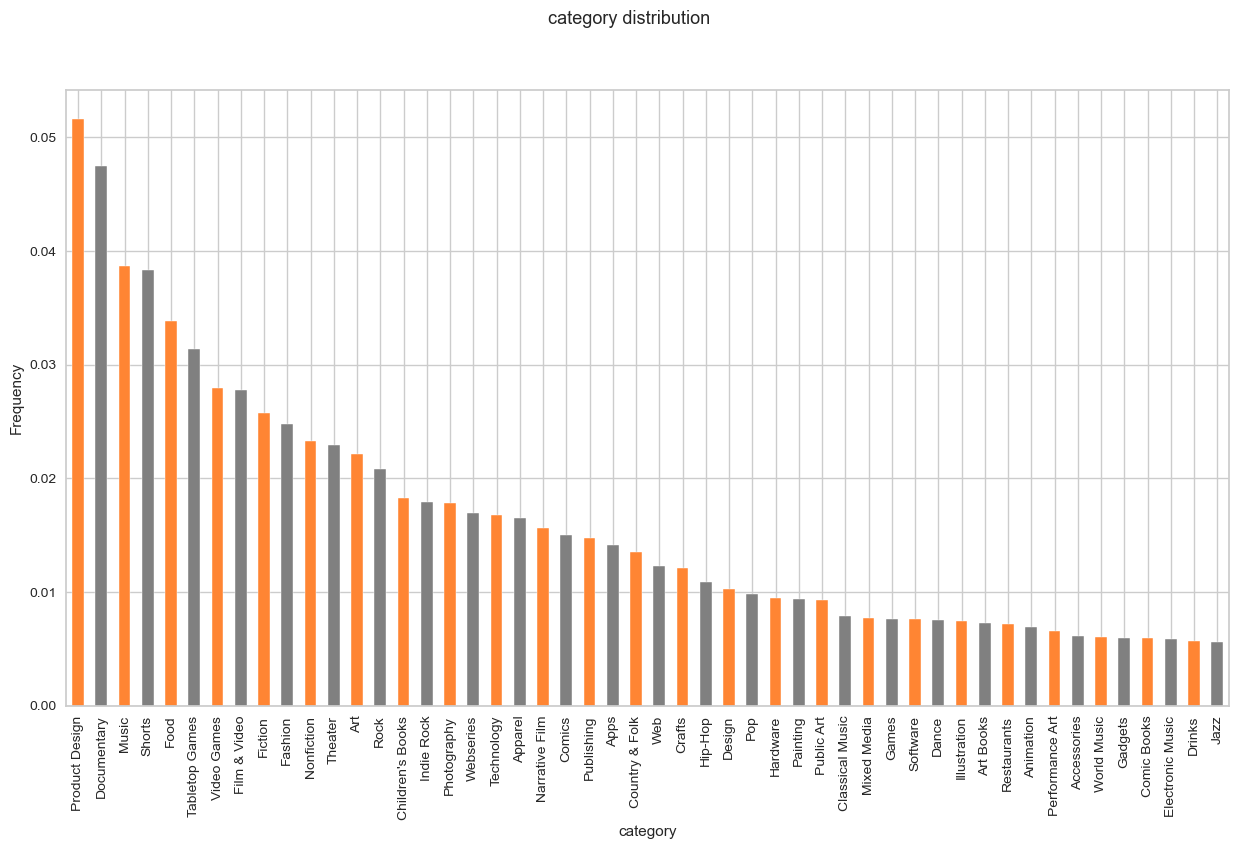

In [24]:
categorical_var_distribution(df, 'category', number_of_bars=50)    

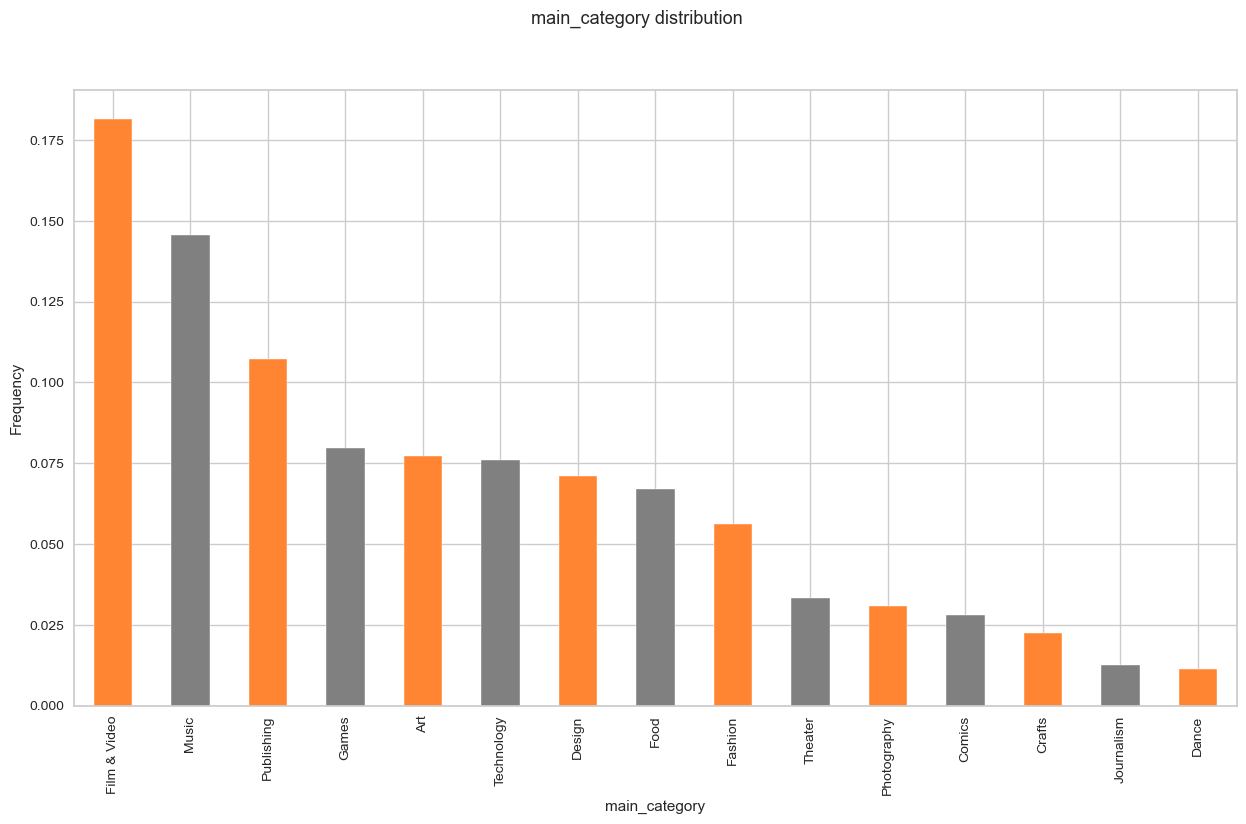

In [25]:
categorical_var_distribution(df,'main_category') 

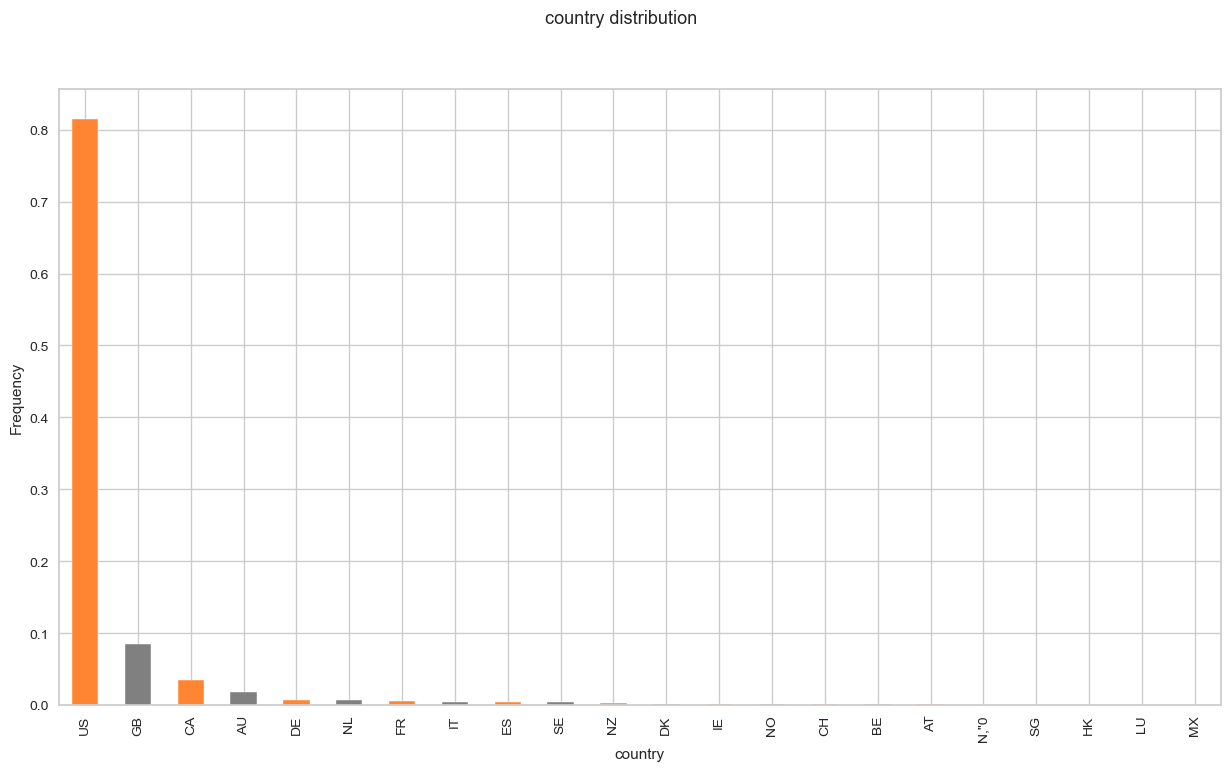

In [4]:
categorical_var_distribution(df,'country')

### Conclusion

## Check the existence of outliers:  whisker plots

'goal' distribution:  


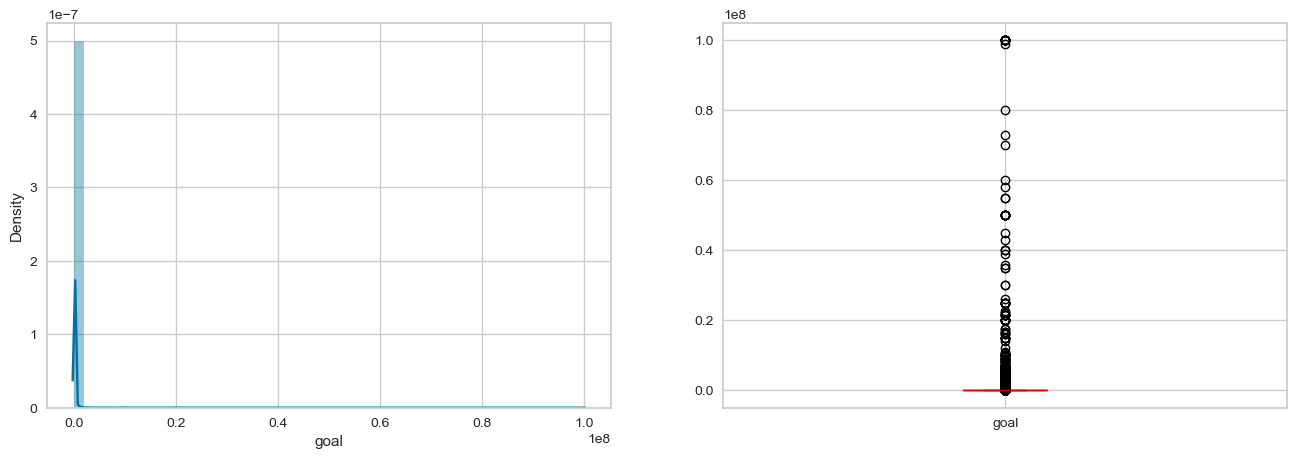

'pledged' distribution:  


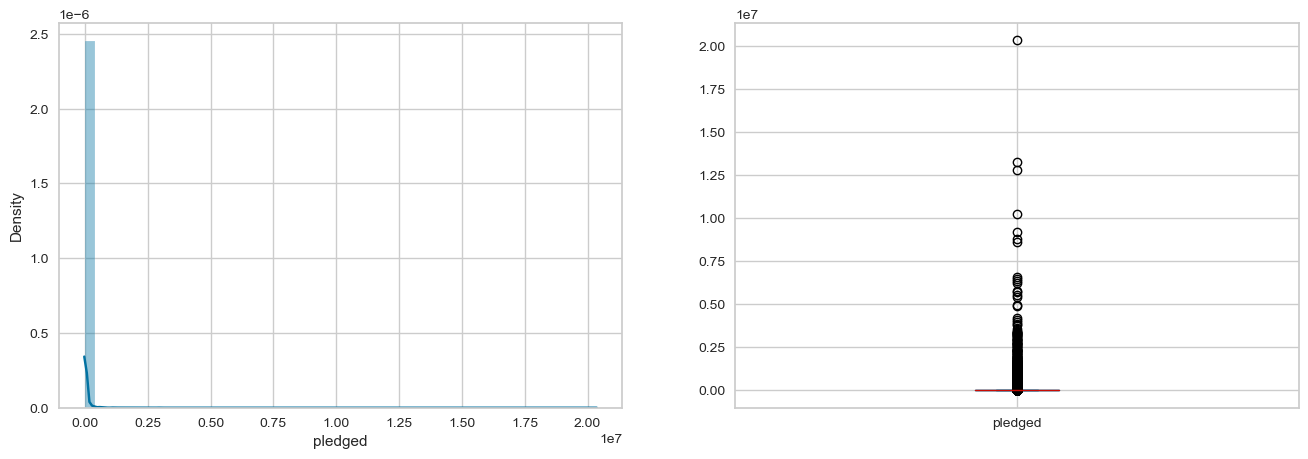

'usd_pledged' distribution:  


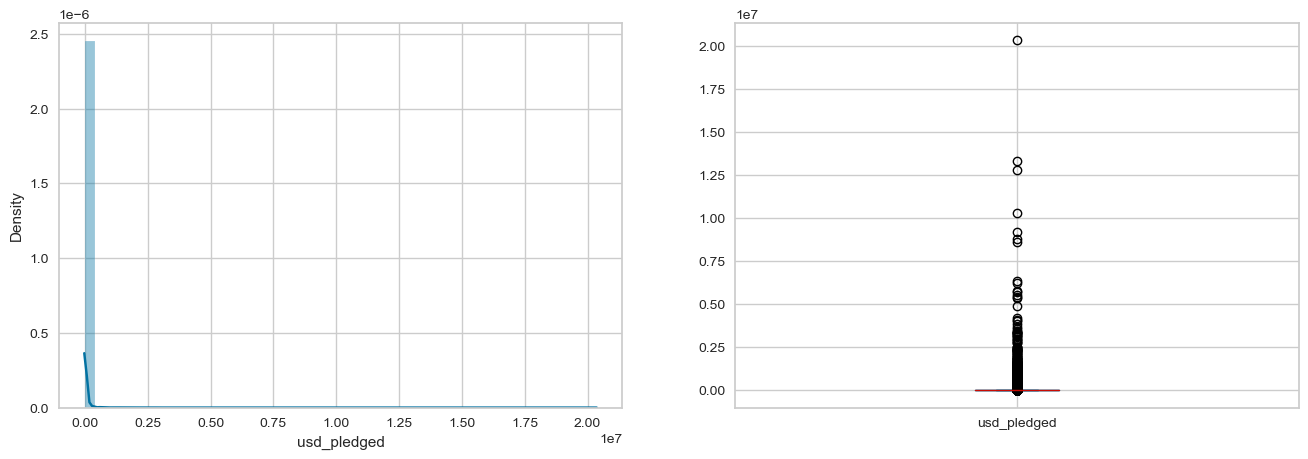

In [3]:
numerical_var_distribution(df)

### Conclusion

The whisker plots for the variables: usd_pledged, goal, and pledged indicate that there are a potential outliers in the dataset. Outlier in our case doesn't mean error in the dataset or wrong records. They are real word case but not very often that happen. As a solution for that we can either remove them from the dataset or minimize these outliers.

## Bivariate Analysis

### Categorical Independent Variable vs Target Variable

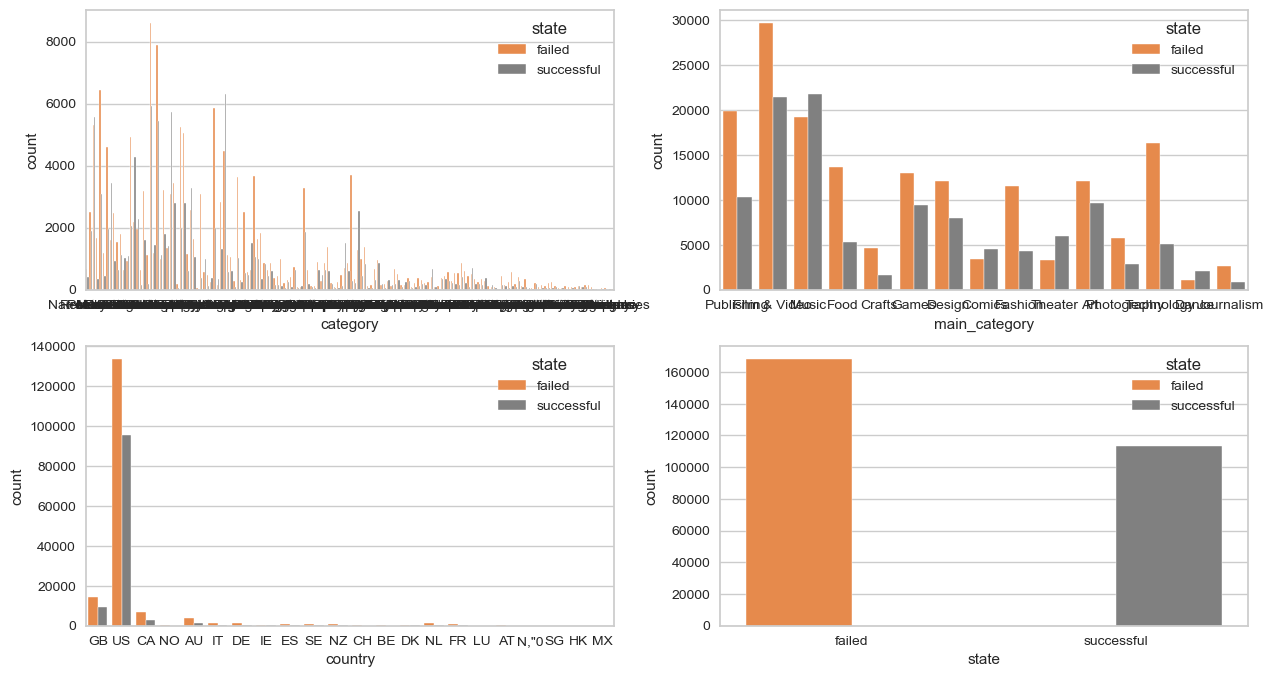

In [15]:
categorical_variables_versus_target(df, target)

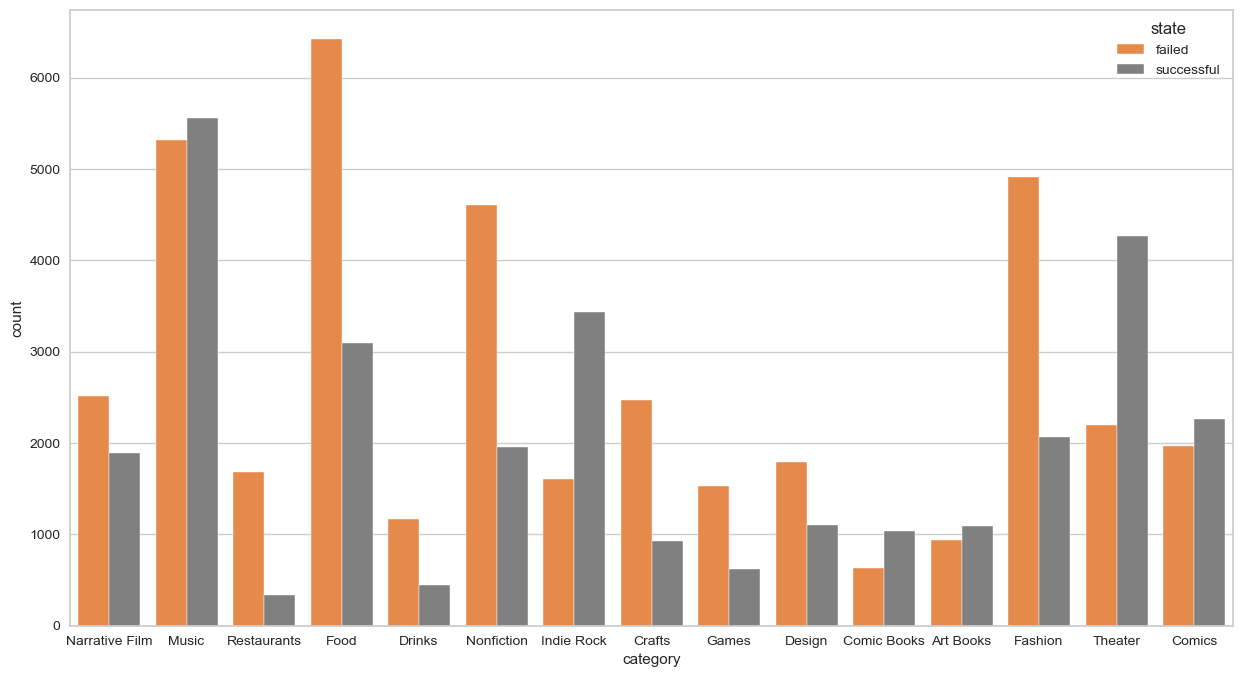

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1)
values_to_plot= df.category.values[1:20]
filtered_df = df[df[CATEGORICAL_COLUMNS_TO_ENCODE[0]].isin(values_to_plot)]
sns.countplot(data=filtered_df, x=CATEGORICAL_COLUMNS_TO_ENCODE[0], hue=target, palette=theme_colors, ax=axes)
fig.set_size_inches(15, 8)

In [31]:
filtered_df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.000000
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.000000
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.000000
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.000000
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323731,999884445,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03 13:04:14,5000.0,2015-11-03 13:04:14,5579.0,successful,103,US,5579.000000
323736,999941823,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,GBP,2013-10-10 22:45:26,16000.0,2013-09-10 22:45:26,2738.0,failed,38,GB,4281.148573
323738,999950812,The Cease is Increase,Nonfiction,Publishing,USD,2012-09-14 17:11:00,4999.0,2012-08-15 17:11:00,980.0,failed,16,US,980.000000
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.000000


## Correlation matrix

<AxesSubplot:>

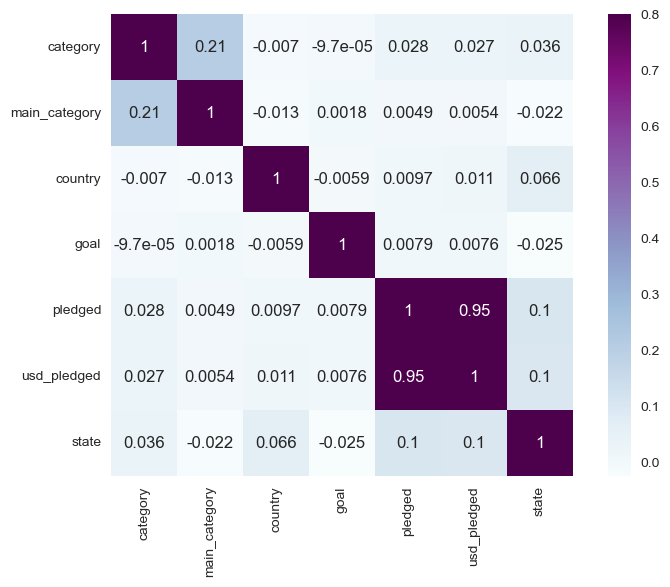

In [30]:

features = ['category', 'main_category','country', 'goal', 'pledged', 'usd_pledged', 'state']
df[CATEGORICAL_COLUMNS_TO_ENCODE] = df[CATEGORICAL_COLUMNS_TO_ENCODE].apply(LabelEncoder().fit_transform)
matrix = df[features].corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

**Interpretaion**:

We check for the variables having highest correlation values, and remove them from the list of features. In our case we don't have any variable that has high corelation value.

As an interpretaion for the above correlation matrix we can conclude that this matrix does't show us a correlation between variables, but this doesn't mean that there is no correlation at all. The metric used in that calculation is a pearson metric. It assess the linear relationship between pairs of variables in a dataset. So, it is possible to have another kind of relationship other than linear (Curvilinear Relationship, non linear, Categorical ...)

